In [1]:
import pandas as pd
import numpy as np
import cv2

In [2]:
from os import listdir
from PIL import Image as PImage

In [3]:
error_count_paratised = 0
correct_img_paratised = []
path_paratised = r"E:\Malaria_cells\cell_images\Parasitized"
images_paratised = listdir(path_paratised)
loaded_paratised = []
for img in images_paratised:
    loaded_paratised.append(path_paratised + '\\' + img)
    
for i in loaded_paratised:
    try:
        correct_img_paratised.append(cv2.resize(cv2.imread(i),(120,120)))
    except:
        error_count_paratised += 1
        print(error_count_paratised)



1


In [4]:
error_count_uninfected = 0

path_uninfected = r"E:\Malaria_cells\cell_images\Uninfected"
images_uninfected = listdir(path_uninfected)
loaded_uninfected = []
correct_img_uninfected = []
for img in images_uninfected:
    loaded_uninfected.append(path_uninfected + '\\' + img)
for i in loaded_uninfected:
    try:
        correct_img_uninfected.append(cv2.resize(cv2.imread(i),(120,120)))
    except:
        error_count_uninfected += 1
        print(error_count_uninfected)

1


In [5]:
paratised_y = [1 for i in range(len(correct_img_paratised))]
uninfected_y = [0 for i in range(len(correct_img_uninfected))]

In [6]:
x = correct_img_paratised + correct_img_uninfected
y = paratised_y + uninfected_y
len(x) == len(y)

True

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
x.shape

(27558, 120, 120, 3)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=72,test_size=0.30,stratify=y)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
#scale_train = MinMaxScaler()
#scale_test = MinMaxScaler()

In [13]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [14]:
x_train.shape

(19290, 120, 120, 3)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(120, 120, 3),padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [18]:
cnn.fit(x_train_scaled,y_train,epochs=25,batch_size=64)

Epoch 1/25
302/302 [==============================] - 9s 31ms/step - loss: 0.3871 - accuracy: 0.8077
Epoch 2/25
302/302 [==============================] - 9s 30ms/step - loss: 0.1718 - accuracy: 0.9413
Epoch 3/25
302/302 [==============================] - 9s 29ms/step - loss: 0.1384 - accuracy: 0.9541
Epoch 4/25
302/302 [==============================] - 9s 29ms/step - loss: 0.1175 - accuracy: 0.9596
Epoch 5/25
302/302 [==============================] - 9s 29ms/step - loss: 0.1010 - accuracy: 0.9650
Epoch 6/25
302/302 [==============================] - 9s 29ms/step - loss: 0.0850 - accuracy: 0.9699
Epoch 7/25
302/302 [==============================] - 9s 29ms/step - loss: 0.0715 - accuracy: 0.9744
Epoch 8/25
302/302 [==============================] - 9s 29ms/step - loss: 0.0604 - accuracy: 0.9765 0s - loss: 0.0
Epoch 9/25
302/302 [==============================] - 9s 29ms/step - loss: 0.0435 - accuracy: 0.9835
Epoch 10/25
302/302 [==============================] - 9s 30ms/step - loss: 

In [19]:
cnn.evaluate(x_test_scaled,y_test)

259/259 [==============================] - 2s 7ms/step - loss: 0.4175 - accuracy: 0.9507


[0.4175294041633606, 0.9506531357765198]

In [20]:
y_pred = [np.argmax(i) for i in cnn.predict(x_test_scaled)]

In [21]:
import matplotlib.pyplot as plt

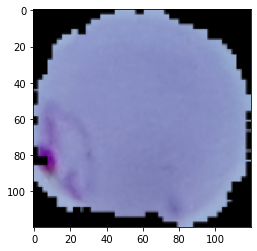

In [22]:
plt.imshow(x_test[111])

In [23]:
y_test[111]

1

In [24]:
y_pred[111]

1

In [25]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4134
           1       0.97      0.93      0.95      4134

    accuracy                           0.95      8268
   macro avg       0.95      0.95      0.95      8268
weighted avg       0.95      0.95      0.95      8268

